# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

Python-dotenv could not parse statement starting at line 14


True

In [4]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API")
print(api_key)

d48f061392e042dfa51c3e183e1f8b72


In [5]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
btc_articles

{'status': 'ok',
 'totalResults': 5123,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
   'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
   'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
   'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
   'publishedAt': '2020-12-03T22:00:00Z',
   'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it wor

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
eth_articles

{'status': 'ok',
 'totalResults': 1319,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
   'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
   'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
   'publishedAt': '2020-11-23T14:16:00Z',
   'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - R

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950


In [10]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.000,0.912
3,2020-12-19,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849
4,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.000,1.000


In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.288200,0.089000,0.017579,0.893368
std,0.356648,0.075414,0.035419,0.082347
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.827500
50%,0.273200,0.076000,0.000000,0.883000
75%,0.630900,0.157000,0.000000,0.975000
max,0.801600,0.209000,0.103000,1.000000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.112815,0.041250,0.008500,0.950250
std,0.229816,0.075056,0.026162,0.082441
min,-0.128000,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.931500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.177900,0.063000,0.000000,1.000000
max,0.877900,0.318000,0.085000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

In [13]:
#Answers:

#A1 = Ethereum
#A2 = Bitcoin
#A3 = Ethereum

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
wnl = WordNetLemmatizer()

stop = stopwords.words('english')

In [16]:
stop.append("''")
stop.append("'")
stop.append('you')
stop.append('if')
stop.append("‘")
stop.append("’")
stop.append('a')
stop.append('for')
stop.append('week')
stop.append('basically')
stop.append('also')
stop.append('is')
stop.append('to')
stop.append('the')
stop.append('/r/n')
stop.append('but')
stop.append('in')
stop.append('to')
stop.append('as')
stop.append('its')
stop.append('FILE')
stop.append('PHOTO')
stop.append('Representation')
stop.append('Reuters')
stop.append('REUTERS')
stop.append('BBC')
stop.append('char')
stop.append('all')
stop.append('time')
stop.append('by')
stop.append('all-time')
stop.append('allmost')
stop.append('year')
stop.append('day')
stop.append('month')

stop = set(stop)



In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))    
    # Remove the punctuation
    words = list(filter(lambda p: p not in punctuation, words))    
    # Remove the stop words
    words = list(filter(lambda s: s.lower() not in stop, words))    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [18]:
btc_df["tokens"] = btc_df["text"].apply(tokenizer)

In [22]:
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[Visa, partnered, cryptocurrency, startup, Blo..."
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826,"[reaching, previous, high, November, 30th, 202..."
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928,"[almost, three, year, since, price, Bitcoin, c..."
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781,"[Everything, dumb, work, 2020, come, close, cr..."
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[November, 2017, absolutely, massive, two-mont..."


In [19]:
eth_df["tokens"] = eth_df["text"].apply(tokenizer)

In [23]:
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.000,0.912,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,2020-12-19,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849,"[Bitcoin, derided, serious, investor, bubble, ..."
4,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams_btc = ngrams(tokenizer(btc_df['text'].str.cat()), N)
Counter(grams_btc).most_common(10)

[(('virtual', 'currency'), 3),
 (('char', 'Reuters'), 3),
 (('Reuters', 'Staff'), 3),
 (('Staff', 'FILE'), 3),
 (('FILE', 'PHOTO'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('breaking', '20,000'), 2),
 (('poster', 'participating'), 2),
 (('PHOTO', 'representation'), 2)]

In [26]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams_btc = ngrams(tokenizer(eth_df['text'].str.cat()), N)
Counter(grams_btc).most_common(10)


[(('virtual', 'currency'), 11),
 (('FILE', 'PHOTO'), 10),
 (('currency', 'Bitcoin'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 9),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 8),
 (('Bitcoin', 'seen'), 8),
 (('LONDON', 'Reuters'), 7),
 (('Ruvic/Illustration', 'LONDON'), 6),
 (('representation', 'virtual'), 6)]

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_token_btc = tokenizer(btc_df['text'].str.cat())
token_count(all_token_btc,10)

[('char', 19),
 ('Bitcoin', 13),
 ('November', 6),
 ('2020', 6),
 ('Reuters', 6),
 ('cryptocurrency', 5),
 ('price', 5),
 ('bitcoin', 4),
 ('20,000', 4),
 ('value', 4)]

In [29]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
all_token_btc = tokenizer(eth_df['text'].str.cat())
token_count(all_token_btc,10)

[('char', 20),
 ('Reuters', 17),
 ('Bitcoin', 15),
 ('virtual', 12),
 ('currency', 12),
 ('taken', 12),
 ('illustration', 11),
 ('REUTERS/Dado', 11),
 ('FILE', 10),
 ('PHOTO', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=600, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.title(title)
    plt.show()


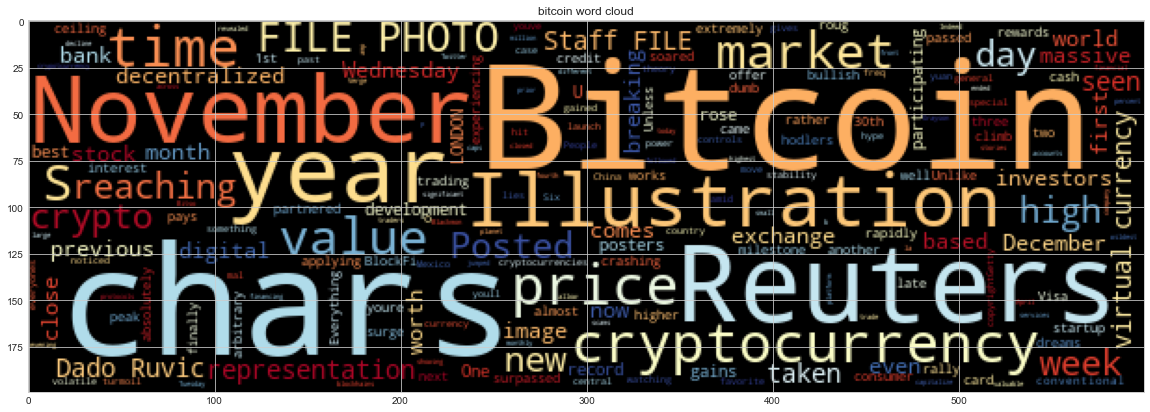

In [32]:
wordcloud(btc_df['text'].str.cat(), title="bitcoin word cloud")

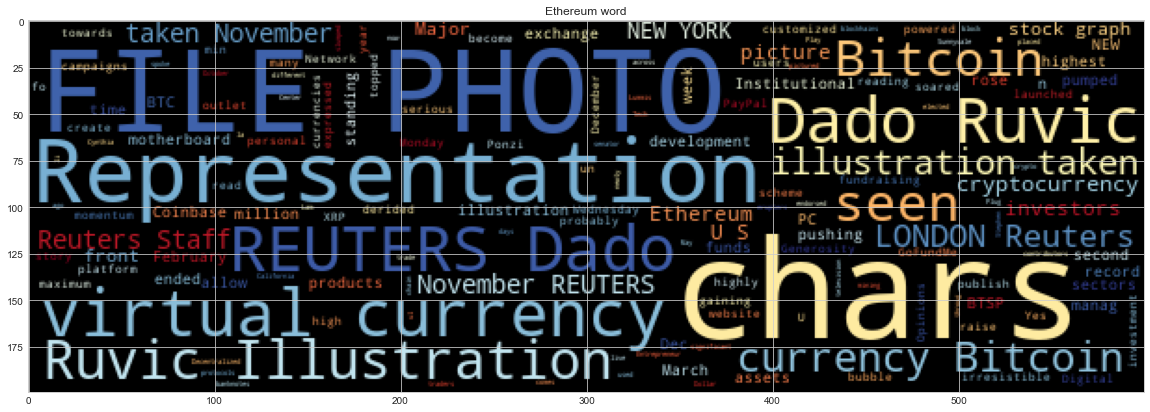

In [35]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth_df['text'].str.cat(), title="Ethereum word")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [36]:
import spacy
from spacy import displacy

In [37]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [39]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_text_btc = btc_df['text'].str.cat()


In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_btc = nlp(all_text_btc)
# Add a title to the document
# YOUR CODE HERE!
doc_btc.user_data['title'] = 'Bitcoin NER'

In [41]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_btc, style='ent')


In [42]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_btc.ents:
    print(ent.text, ent.label_)


Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
chars]Six years DATE
Mexico GPE
$62 million MONEY
chars]4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
One CARDINAL
the year DATE
the day DATE
Twitter ORG
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
chars]6 CARDINAL
6 CARDINAL
one CARDINAL
above $

---

## Ethereum NER

In [43]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_text_et = eth_df['text'].str.cat()

In [44]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_et = nlp(all_text_et)
# Add a title to the document
# YOUR CODE HERE!
doc_et.user_data['title'] = 'Ethereum NER'

In [45]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_et, style='ent')


In [46]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_et.ents:
    print(ent.text, ent.label_)


February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
15, 2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
